In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [3]:
df_placement = pd.read_csv('/content/Placement_Data_Full_Class.csv')

In [7]:

df_placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
df_placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
df_placement.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [9]:
df_num = df_placement.select_dtypes(np.number)

In [10]:
df_num.columns

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

##Making Boxplots and Calculating Quantiles

<Axes: ylabel='ssc_p'>

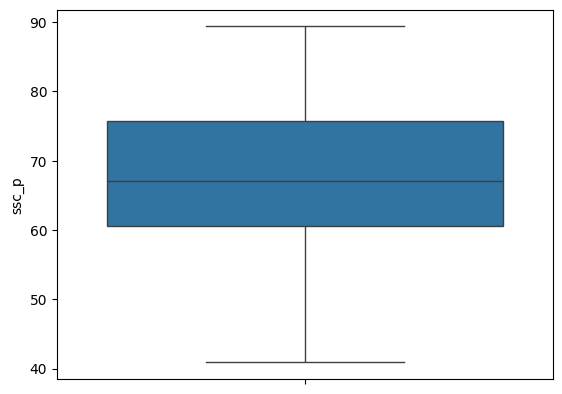

In [12]:
#For making a boxplot
sns.boxplot(y='ssc_p', data = df_num)

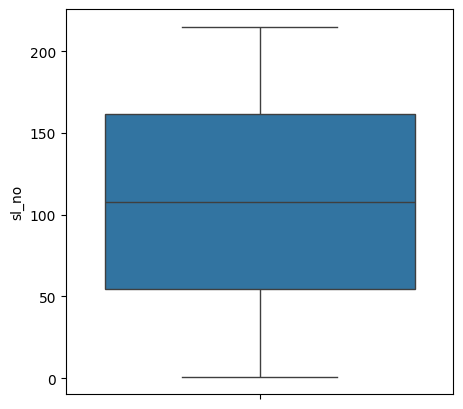

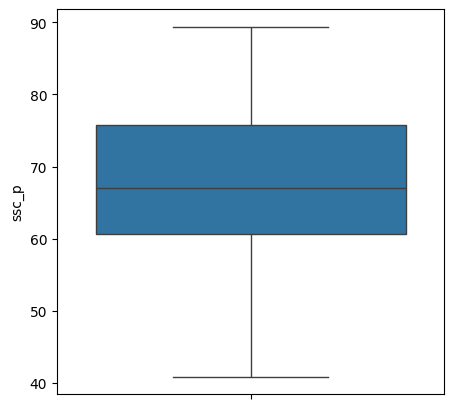

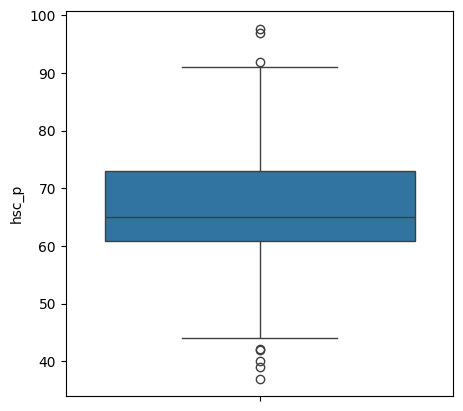

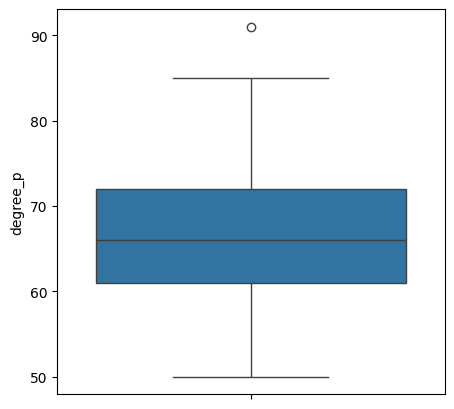

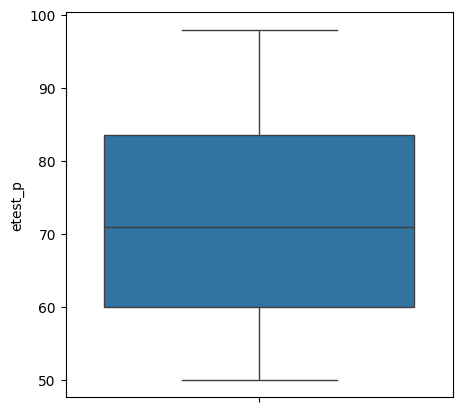

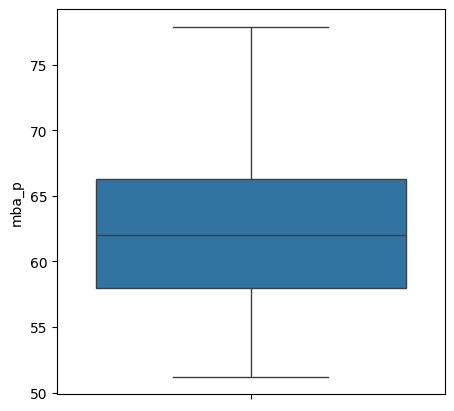

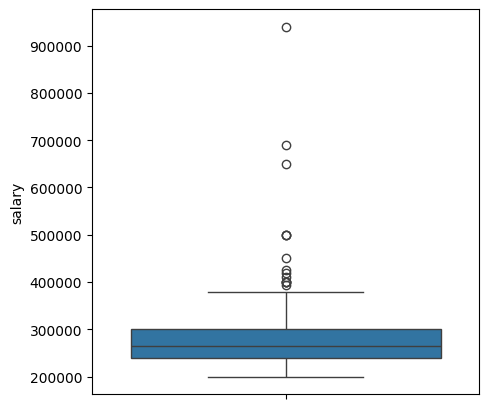

In [14]:
for i in df_num:
  plt.figure(figsize = (5,5))
  sns.boxplot(y =i, data = df_num)
  plt.show()


In [17]:
df_num.quantile([.25,.5,.75])

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0.25,54.5,60.6,60.9,61.0,60.0,57.945,240000.0
0.50,108.0,67.0,65.0,66.0,71.0,62.000,265000.0
0.75,161.5,75.7,73.0,72.0,83.5,66.255,300000.0


##Calculating Min and Max Values (25% and 75%)

In [20]:
#hsc_p
min = 60.9-(1.5*12.1)
max = 73.0+(1.5*12.1)
print(min,max)

42.75 91.15


##Finding the Outliers

In [22]:
#finidng the outlier
df1 = df_num[(df_num['hsc_p']<42.75) | (df_num['hsc_p']>91.15)]

##Trimming (Removing the outliers)

In [23]:
#Trimming
df_num[(df_num['hsc_p']>42.75) | (df_num['hsc_p']<91.15)]

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1,67.00,91.00,58.00,55.0,58.80,270000.0
1,2,79.33,78.33,77.48,86.5,66.28,200000.0
2,3,65.00,68.00,64.00,75.0,57.80,250000.0
3,4,56.00,52.00,52.00,66.0,59.43,NaN
4,5,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0
211,212,58.00,60.00,72.00,74.0,53.62,275000.0
212,213,67.00,67.00,73.00,59.0,69.72,295000.0
213,214,74.00,66.00,58.00,70.0,60.23,204000.0


##Winsorization

In [24]:
a = df_num['hsc_p']

In [25]:
a

0      91.00
1      78.33
2      68.00
3      52.00
4      73.60
       ...  
210    82.00
211    60.00
212    67.00
213    66.00
214    58.00
Name: hsc_p, Length: 215, dtype: float64

In [26]:
b = winsorize(a,limits = [.2,.2])

In [27]:
b.shape

(215,)

In [28]:
a.shape

(215,)

In [29]:
df_num.shape

(215, 7)

In [30]:
df1.shape

(8, 7)